In [98]:
import numpy as np
import pandas as pd
import re

In [99]:
retext = re.compile(r"""[0-9]+[ ](BHK)""")
retext_area = re.compile(r"""^[0-9]+""")

In [101]:
rs_data = pd.read_csv(r"C:\Users\Achintj\Python Code\Web Scraping\MBFinal\BangaloreRealStateData.csv",encoding = "latin-1")
rs_data.head()

,Area,Price,Type,Size
0,Devanahalli,1.35 Cr,Residential Plot,2490 sqft
1,Kanakapura Road,86.9 Lac,3 BHK 1665 Sq-ft Flat,1665 sqft
2,Hesaraghatta Main Road,52.6 Lac,3 BHK 1210 Sq-ft Flat,1210 sqft
3,Whitefield,70.0 Lac,2 BHK 1390 Sq-ft Flat,1390 sqft
4,Sarjapur Road,2.11 Cr,3 BHK Villa,3275 sqft


In [102]:
rs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 4 columns):
Area     14920 non-null object
Price    14920 non-null object
Type     14920 non-null object
Size     14920 non-null object
dtypes: object(4)
memory usage: 467.3+ KB


In [103]:
rs_data.describe()

,Area,Price,Type,Size
count,14920,14920,14920,14920
unique,1301,1032,4019,1909
top,Unknown,65.0 Lac,Residential Plot,1200 sqft
freq,1332,418,3918,1770


In [105]:
rs_data["Area"].fillna( method ='ffill', inplace = True)
rs_data["Size"].fillna(method ='ffill', inplace = True)
rs_data["Price"].fillna( method ='ffill', inplace = True)
rs_data["Type"].fillna( method ='ffill', inplace = True)
rs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 4 columns):
Area     14951 non-null object
Price    14951 non-null object
Type     14951 non-null object
Size     14951 non-null object
dtypes: object(4)
memory usage: 467.3+ KB


In [106]:
def priceconverter(original):
    if 'Cr' in original:
        r = float(original.strip(' Cr'))
        r = r * 10000000
        return r
    elif 'Lac' in original:
        r = float(original.strip(' Lac'))
        r = r * 100000
        return r
    return float(original)

def sizeconverter(original):
    if 'sqft' in original:
        try:
            r = int(re.search(retext_area,original).group())
        except:
            r = int(original)
        return r
    elif 'sqm' in original:
        try:
            r = int(re.search(retext_area,original).group())
        except:
            r = int(original)
        r = r * 3.28084
        return r
    elif 'sqyrd' in original:
        try:
            r = int(re.search(retext_area,original).group())
        except:
            r = int(original)
        r = r * 3
        return r
    else:
        try:
            r = re.search(retext_area,original).group()
        except:
            r = 0
        return int(r)

def housetype(original):
    try:
        r = re.search(retext,original).group()
    except:
        r = original
    return r

In [107]:
rs_data['Price'] = rs_data['Price'].apply(priceconverter)
rs_data['Size'] = rs_data['Size'].apply(sizeconverter)
rs_data['Type']= rs_data['Type'].apply(housetype)

In [108]:
rs_data.head()

,Area,Price,Type,Size
0,Devanahalli,13500000.0,Residential Plot,2490.0
1,Kanakapura Road,8690000.0,3 BHK,1665.0
2,Hesaraghatta Main Road,5260000.0,3 BHK,1210.0
3,Whitefield,7000000.0,2 BHK,1390.0
4,Sarjapur Road,21100000.0,3 BHK,3275.0


In [109]:
rs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 4 columns):
Area     14951 non-null object
Price    14951 non-null float64
Type     14951 non-null object
Size     14951 non-null float64
dtypes: float64(2), object(2)
memory usage: 467.3+ KB


In [110]:
rs_data.Type.value_counts()

2 BHK                5053
3 BHK                3957
Residential Plot     3927
4 BHK                 874
1 BHK                 352
5 BHK                 266
6 BHK                 161
10 BHK                 92
7 BHK                  89
8 BHK                  67
9 BHK                  48
Residential House      42
Studio Apartment       14
Villa                   5
Flat                    4
Name: Type, dtype: int64

In [111]:
rs_data.drop_duplicates(inplace = True)

In [112]:
rs_data.Type.value_counts()

2 BHK                4706
3 BHK                3749
Residential Plot     3334
4 BHK                 831
1 BHK                 334
5 BHK                 259
6 BHK                 154
10 BHK                 87
7 BHK                  83
8 BHK                  67
9 BHK                  46
Residential House      41
Studio Apartment       13
Villa                   5
Flat                    4
Name: Type, dtype: int64

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression, Ridge, RANSACRegressor, Lasso, HuberRegressor, TheilSenRegressor
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

In [170]:

# rs_data.drop(rs_data['AreaSqft'].idxmax(),axis = 0, inplace = True)
rs_data.drop(rs_data[rs_data.Size >= 10000].index,axis = 0, inplace = True)
rs_data.drop(rs_data[rs_data.Size == 0].index,axis = 0, inplace = True)
rs_data.drop(rs_data[rs_data.Price > (0.10 * 10**9)].index,axis = 0, inplace = True)

In [171]:
X = rs_data.drop('Price',axis =1)
Y = rs_data.Price

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 0 to 14950
Data columns (total 3 columns):
Area    13680 non-null object
Type    13680 non-null object
Size    13680 non-null float64
dtypes: float64(1), object(2)
memory usage: 427.5+ KB


In [158]:
rs_data.max()

Area     vayunandana layout
Price               2.5e+08
Type                  Villa
Size                  24000
dtype: object

In [159]:
Y.fillna( np.mean, inplace = True)

In [177]:
mypipeline_ohe = Pipeline(steps = [
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
mypipeline_ohe2 = Pipeline(steps = [
    ('encoder2', OneHotEncoder(handle_unknown='ignore'))
])
mypipeline_scaler = Pipeline(steps = [
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('encoderonehot',mypipeline_ohe,['Area']),
        ('encoderonehot2',mypipeline_ohe2,['Type']),
        ('scale', mypipeline_scaler, ['Size'])
    ])

In [178]:
AllModels = [ExtraTreeRegressor(),RadiusNeighborsRegressor(radius=3),HuberRegressor(),KNeighborsRegressor(weights = 'distance'),DecisionTreeRegressor(),RandomForestRegressor(n_estimators = 100),RANSACRegressor(),SGDRegressor(max_iter = 1000, tol = 0.001),LinearRegression(),Ridge(alpha =10,max_iter=1000, tol=0.001) ,Lasso(alpha =100,max_iter=1000, tol=0.001)]
AllModelsName = ['ExtraTreeRegressor()','RadiusNeighborsRegressor(radius=3)','HuberRegressor()','KNeighborsRegressor(weights = distance)','DecisionTreeRegressor()','RandomForestRegressor(n_estimators = 100)','RANSACRegressor()','SGDRegressor(max_iter = 1000, tol = 0.001)','LinearRegression()','Ridge(alpha =10,max_iter=1000, tol=0.001)' ,'Lasso(alpha =10,max_iter=1000, tol=0.001)']


In [179]:
pipelines= []
for models in AllModels:
    pipeline = Pipeline(steps = [
        ('preprocessor',preprocessor),
        ('Classifier',models)
    ])
    pipelines.append(pipeline)

In [180]:
trainX,testX,trainY,testY = train_test_split(X,Y)

In [181]:
for pipeline in pipelines:    
    pipeline.fit(trainX,trainY)
    print(pipeline)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('encoderonehot', Pipeline(memory=None,
     steps=[('encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'nump...s_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random'))])
Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('encoderonehot', Pipeline(memory=None,
     steps=[('encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'nump...ski',
             metric_params=None, n_jobs=None, p=2, radius=3,
             weights='uniform'))])
Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         trans

In [182]:
preds = []
for index,pipeline in enumerate(pipelines):        
    print(str(AllModelsName[index])," = ",pipeline.score(testX,testY))
    pred = pipeline.predict(X)
    preds.append(pred)

ExtraTreeRegressor()  =  0.24137511490950359
RadiusNeighborsRegressor(radius=3)  =  0.2728779394403146
HuberRegressor()  =  0.35038849841921116
KNeighborsRegressor(weights = distance)  =  0.4177935448093172
DecisionTreeRegressor()  =  0.22309719738404873
RandomForestRegressor(n_estimators = 100)  =  0.3803656793151339
RANSACRegressor()  =  0.3799288471743001
SGDRegressor(max_iter = 1000, tol = 0.001)  =  0.4529442801518885
LinearRegression()  =  0.4431795219790488
Ridge(alpha =10,max_iter=1000, tol=0.001)  =  0.4616135735659442
Lasso(alpha =10,max_iter=1000, tol=0.001)  =  0.44675492335166217


In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
rs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 0 to 14950
Data columns (total 4 columns):
Area     13680 non-null object
Price    13680 non-null float64
Type     13680 non-null object
Size     13680 non-null float64
dtypes: float64(2), object(2)
memory usage: 534.4+ KB


(<matplotlib.collections.PathCollection at 0xb029663550>,
 <matplotlib.collections.PathCollection at 0xb029663860>)

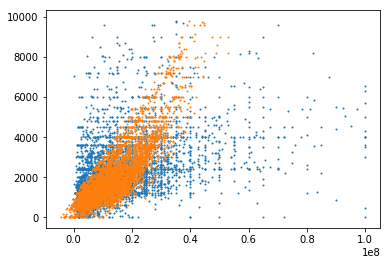

In [176]:
plt.scatter(y=rs_data.Size,x= rs_data.Price,s = 1), plt.scatter(y=rs_data.Size,x= preds[9],s = 1), 

In [69]:
AllModels

[ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='random'),
 RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=None, p=2, radius=3,
              weights='uniform'),
 HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
         tol=1e-05, warm_start=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fra

In [68]:
preds[9][:10]

array([10143640.5448494 ,  9961377.51129024,  8490530.40481191,
        8179455.85665804, 17997668.72504648,  5220626.67512319,
       11191737.47387437, 11911822.39100941,  5267859.87556028,
        8459886.35748206])

In [61]:
Y[:10]

0    13500000.0
1     8690000.0
2     5260000.0
3     7000000.0
4    21100000.0
5     2340000.0
6     7590000.0
7    12500000.0
8     4500000.0
9     6830000.0
Name: Price, dtype: float64